In [1]:
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
    

## Load images

Remember to change ```image_path``` to a local machine

(tnia-python-images can be found [here](https://www.dropbox.com/scl/fo/1k3ujlh3lmk1pmnvpk3xb/h?rlkey=fqwp26p8ygdknqbc1ucajqssn&dl=0) )

(64, 256, 256) (128, 256, 256) (128, 256, 256)


Text(0.5, 0.98, 'imgage')

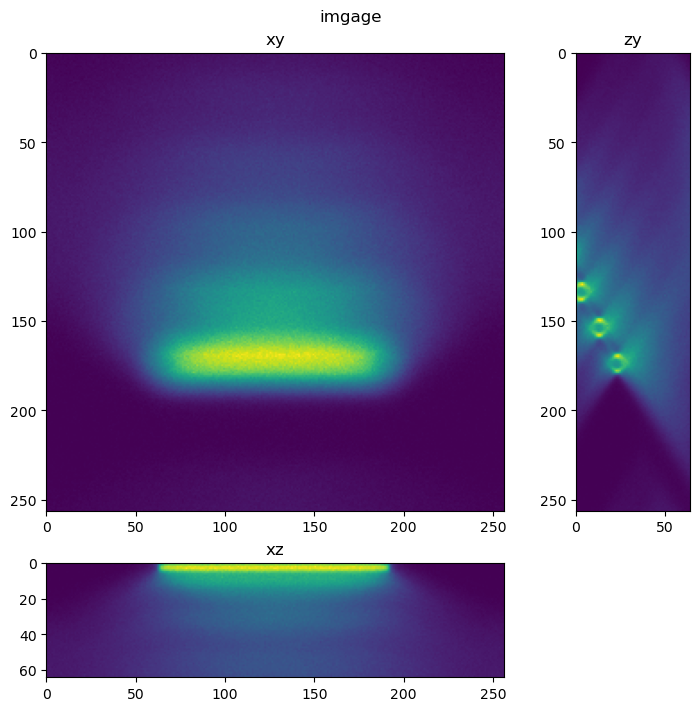

In [2]:
from skimage.io import imread
from pathlib import Path
from tnia.plotting.projections import show_xyz_slice_center 
# local path to the data folder
image_path = Path(r'D:\images\tnia-python-images\deconvolution\bars')

image_name='Bars-G10-P30-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

img=imread(image_path / image_name)

img = img[img.shape[0]//2:,:,:]

psf=imread(image_path / psf_name)
truth=imread(image_path / truth_name)
img=img.astype('float32')
psf=psf.astype('float32')
psf=psf/psf.sum()
print(img.shape, psf.shape, truth.shape)

fig = show_xyz_slice_center(img, figsize=(7,7))
fig.suptitle('imgage')

In [5]:
from tnia.deconvolution.richardson_lucy_dask_cp import richardson_lucy_cp

decon = richardson_lucy_cp(img, psf, 100, True)
decon2 = richardson_lucy_cp(img, psf, 100, False)


0 10 20 30 40 50 60 70 80 90 
padding psf


ValueError: index can't contain negative values

In [6]:
import napari
viewer = napari.Viewer()
viewer.add_image(img)
viewer.add_image(decon)

<Image layer 'decon' at 0x20d7549ab80>